### Static Variable

* Class level variable are called static variable.
* You do not need object to access these variables.
* Same copy is shared with all objects.
* You may access these variable with syntax:- class_name.Var_name. Making any changes using this syntax will reflect the changes in all object’s copy.
* But if you access this variable with syntax:- obj_name.Var_name then changes will be reflecting only for that object but not for others and for class variable. [NOTE:- Only in case of Immutable objects.]

In [1]:
class Foo(object):
    x = 'a'

In [2]:
Foo

__main__.Foo

In [3]:
Foo.x

'a'

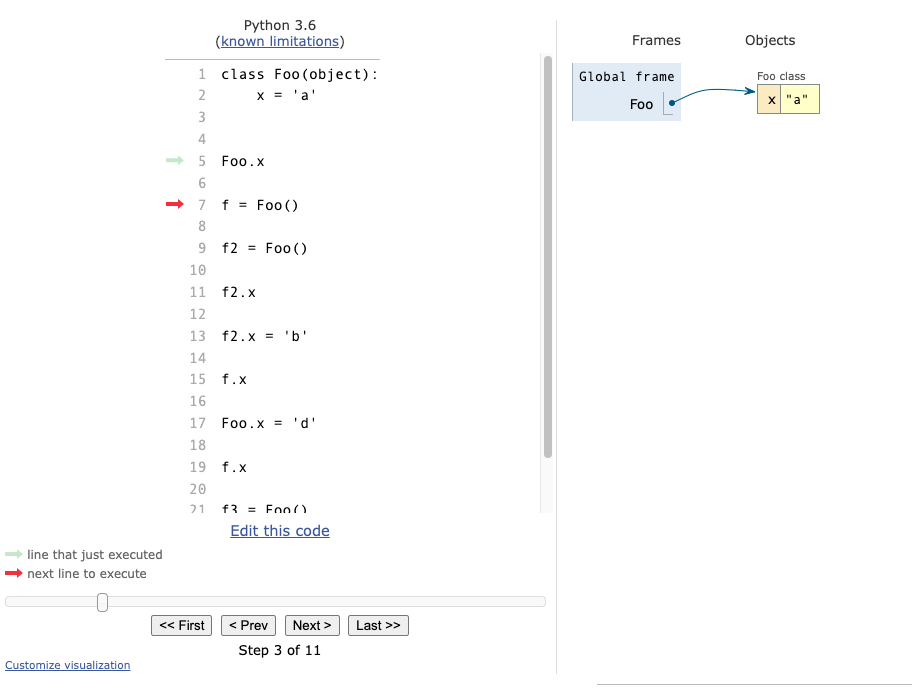

In [4]:
Foo.__dict__

mappingproxy({'__module__': '__main__',
              'x': 'a',
              '__dict__': <attribute '__dict__' of 'Foo' objects>,
              '__weakref__': <attribute '__weakref__' of 'Foo' objects>,
              '__doc__': None})

In [5]:
f = Foo()

In [6]:
f

In [7]:
f.__dict__

{}

In [8]:
f.x

'a'

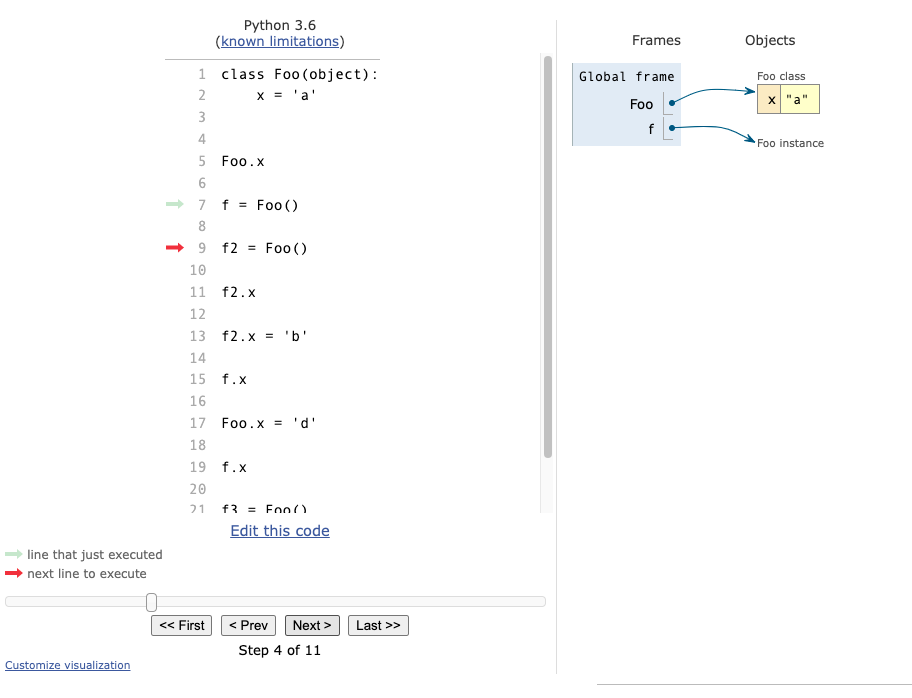

In [9]:
f2 = Foo()

In [10]:
f2

In [11]:
f2.x

'a'

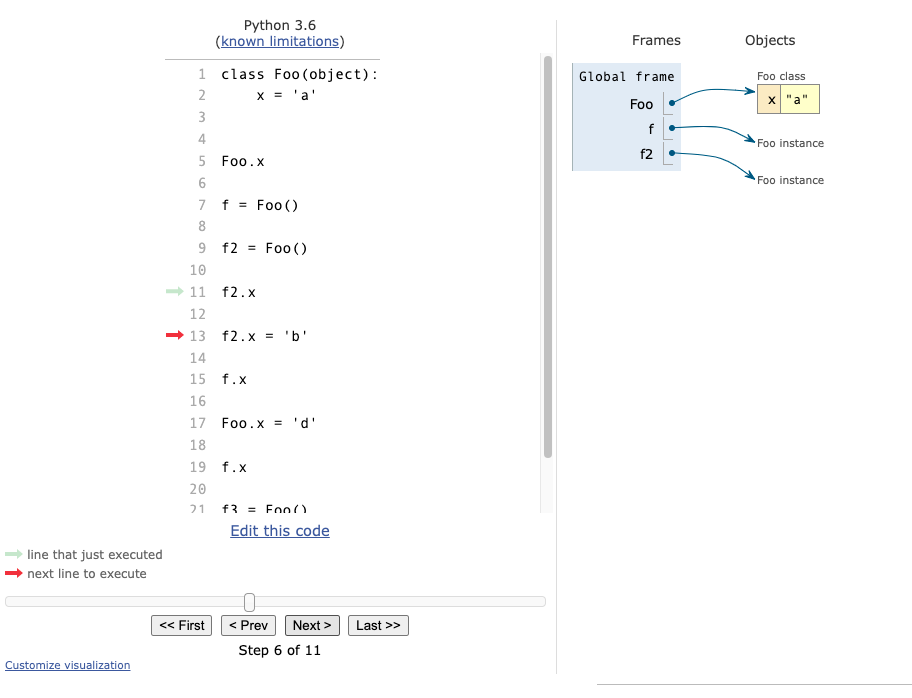

In [12]:
f2.__dict__

{}

In [13]:
f2

In [14]:
f2.x = 'b'

In [15]:
f2.x

'b'

In [16]:
f2.__dict__

{'x': 'b'}

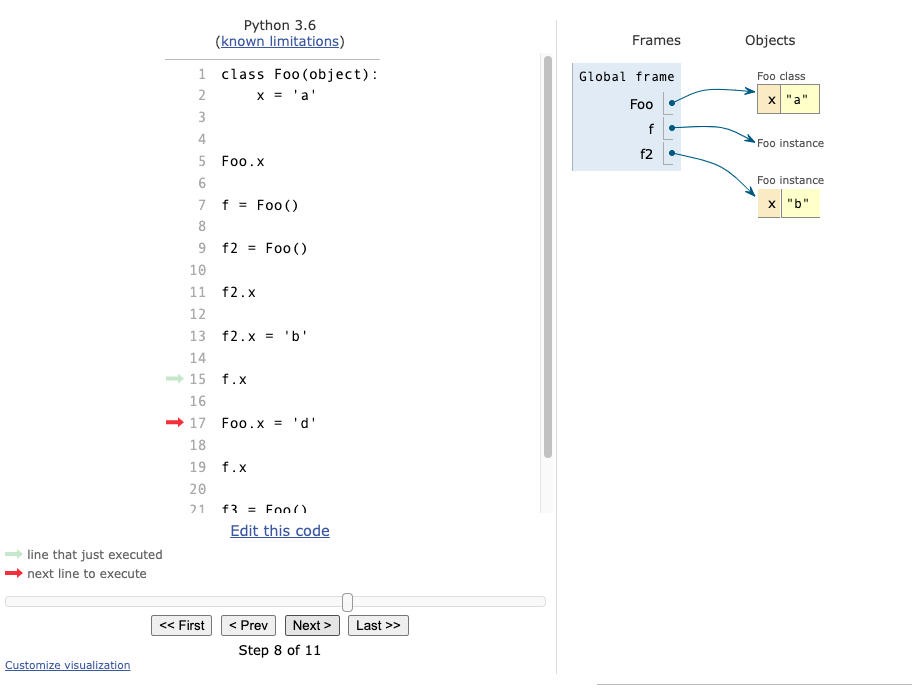

In [17]:
f.x

'a'

In [18]:
f.__dict__

{}

In [19]:
Foo.x = 'd'

In [20]:
f.x

'd'

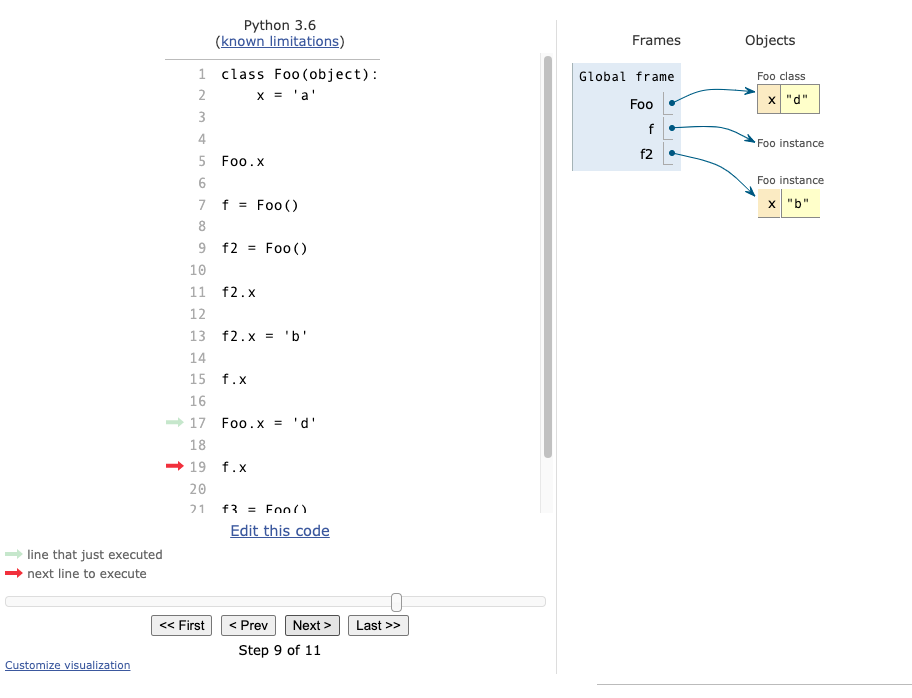

In [21]:
f3 = Foo()

In [22]:
f3

In [23]:
f3.__dict__

{}

In [24]:
f3.x

'd'

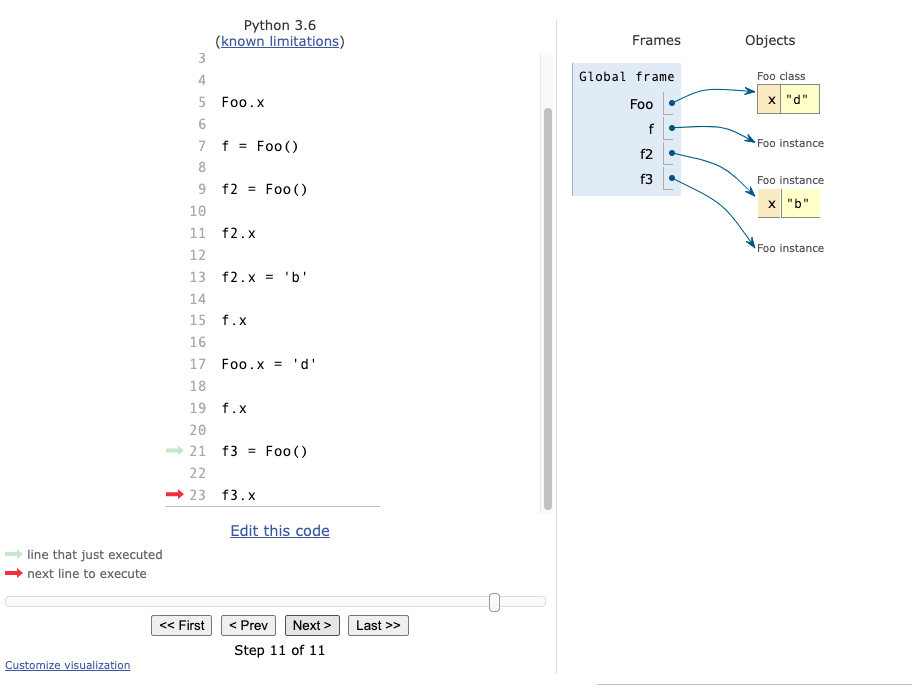

In [25]:
# Immutable type
class MyFirstClass: 
    num = 10 
    def __init__(self): 
        self.num+=1 
    def obj_num(self): 
        print("For obj {} num is {}".format(self, self.num))

In [26]:
print(MyFirstClass.num)
obj1 = MyFirstClass() 
obj2 = MyFirstClass()

obj1.num+=1 
print("num for class is {}".format(MyFirstClass.num)) 
print("num for obj1 is {}".format(obj1.num)) 
print("num for obj2 is {}".format(obj2.num)) 
 
obj1.obj_num() 
obj2.obj_num()

print("num for class is {}".format(MyFirstClass.num)) 

10
num for class is 10
num for obj1 is 12
num for obj2 is 11
For obj <__main__.MyFirstClass object at 0x7ff427898e50> num is 12
For obj <__main__.MyFirstClass object at 0x7ff427898130> num is 11
num for class is 10


In [27]:
# Mutable type
class MyFirstClass: 
    lst = [] 
    def __init__(self, num): 
       self.lst += [num] 
    def obj_lst(self): 
        print("For obj {} list is {}".format(self, self.lst))

In [28]:
print("lst for class is {}".format(MyFirstClass.lst)) 
obj1 = MyFirstClass(10) 
obj2 = MyFirstClass(20) 
obj1.lst += [100] 
print("lst for class is {}".format(MyFirstClass.lst)) 
print("lst for obj1 is {}".format(obj1.lst)) 
print("lst for obj2 is {}".format(obj2.lst)) 
 
obj1.obj_lst() 
obj2.obj_lst() 

lst for class is []
lst for class is [10, 20, 100]
lst for obj1 is [10, 20, 100]
lst for obj2 is [10, 20, 100]
For obj <__main__.MyFirstClass object at 0x7ff4278989a0> list is [10, 20, 100]
For obj <__main__.MyFirstClass object at 0x7ff42789f250> list is [10, 20, 100]


In [29]:
## the first test will use an int, which is immutable.
class test1:
  i = 0
  def add(self):
      self.i = self.i + 1

t = test1()
t.add()
t2 = test1()
t2.add()
t3 = test1()
t3.add()

## this will output 1, cool
print(t3.i)

## Lets try it again with a dictionary - which is a mutable type
class test2:
  i = {} ## lets use a dictionary
  def add(self, str):
      self.i[str] = 1;


t = test2()
t.add('hi');
t.add('steve');
print(t.i)
# Will print the expected:
# {'steve': 1, 'hi': 1}


t2 = test2()
t2.add('bacon')
print(t2.i)

# But this prints:
# {'steve': 1, 'hi': 1, 'bacon': 1}
# Unexpected, in most languages

## it's necessary to define test2 in the following manner to avoid this weirdness

class test2:
  def __init__(self):
      self.i = {}
  def add(self, str):
      self.i[str] = 1;


t = test2()
t.add('hi');
t.add('steve');
print(t.i)
# Will print the expected:
# {'steve': 1, 'hi': 1}

t2 = test2()
t2.add('bacon')
print(t2.i)

# Will now print the expected:
# {'bacon': 1}

1
{'hi': 1, 'steve': 1}
{'hi': 1, 'steve': 1, 'bacon': 1}
{'hi': 1, 'steve': 1}
{'bacon': 1}


There’s a weird behavior in Python when dealing with Mutable types such as lists or dictionaries, that when you modify a variable defined as a class attribute, you’re actually modifying a shared dictionary amongst all the classes.

If you assign, you get a new one. 
If it’s modifiable, then unless you assign you are working on a singleton. So a typical pattern is as follows.

In [30]:
class Foo:
    something = None # Static: visible to all classes
    def f(self, x):
        if not self.something:
            self.something = [] # New local version for this object
        self.something.append(x)